In [1]:
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
import os

In [2]:
transform = transforms.ToTensor() # raw transform just to visualize. when training will want to use the one in something.py

train_dataset = datasets.SVHN(root='./data', split='train', download=True, transform = transform)
test_dataset = datasets.SVHN(root='./data', split='test', download=True, transform = transform)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

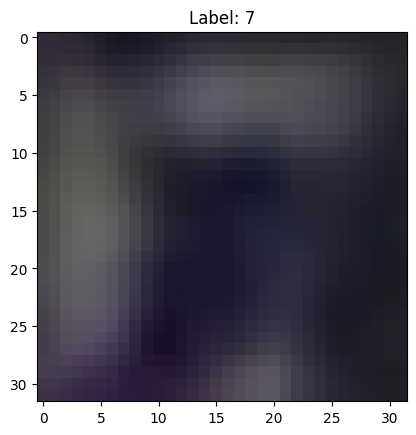

In [15]:
img, label = next(iter(train_loader))

img0 = img[0]
img_np = img0.permute(1, 2, 0).numpy()
plt.imshow(img_np)
plt.title(f'Label: {label[0].item()}')
plt.savefig(f'images/svhn_image0.png')
plt.show()

In [8]:
X_train = []
y_train = []
for img, label in train_loader:
    X_train.append(img.view(img.size(0), -1).numpy())
    y_train.append(label.numpy())

X_train = np.concatenate(X_train)
y_train = np.concatenate(y_train)

X_test = []
y_test = []

for img, label in test_loader:
    X_test.append(img.view(img.size(0), -1).numpy())
    y_test.append(label.numpy())

X_test = np.concatenate(X_test)
y_test = np.concatenate(y_test)

In [9]:
n_components = 100
pca = PCA(n_components = n_components)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)